In [7]:
import os
import numpy as np

file="G:\density_rho_H_N600\9.026n_all.cbin"
f=open(file,'rb')
n=np.fromfile(f,count=3,dtype='int32')
print (n)
densityH=np.fromfile(f,dtype='float32')
print (densityH)


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_11304\3002330286.py:4: SyntaxWarning: invalid escape sequence '\d'
  file="G:\density_rho_H_N600\9.026n_all.cbin"


[600 600 600]
[14225.778 11842.99  10222.027 ... 13964.743 11734.076 14410.068]


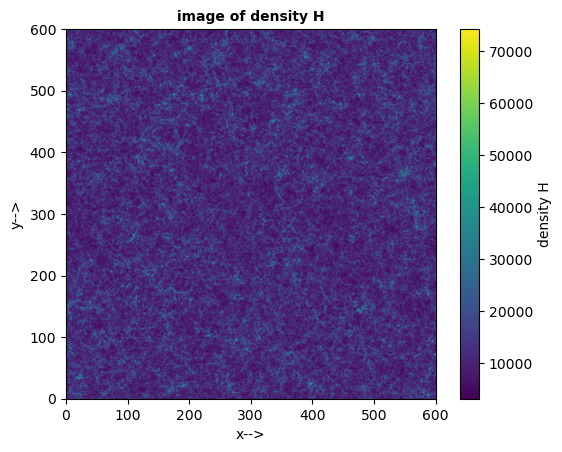

In [12]:
import matplotlib.pyplot as plt
densityH=densityH.reshape((600,600,600),order='C')
fig,ax=plt.subplots()
plt.imshow(densityH[0],)#first plane along z direction
ax.set_title("image of density H",fontsize=10,fontweight='bold')
ax.set_xlabel('x-->')
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_ylabel('y-->')
plt.colorbar(label='density H',orientation="vertical")
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

d_path=r'G:\density_rho_H_N600'
target_z=[10.11,10.29,10.478,10.673,10.877,11.313,11.546,11.791,12.048,12.318,12.603,12.903,13.221,13.557,13.914,14.294,14.699,15.132,15.596,16.095,16.633,17.215,17.848]
target_z.sort()
#print (target_redshifts)

#from the density files
def extract_z(d_filename):
    z_str=d_filename.split('n')[0]
    return float(z_str)

def read_array(path):
    f=open(path,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    rho=np.fromfile(f,dtype='float32')
    return rho

files=glob.glob(os.path.join(d_path,"*.cbin"))
file_map={}

for f in files:
    z=extract_z(os.path.basename(f))
    file_map[z]=f

available_z=sorted(file_map.keys())
print(f"Available redshift range: {available_z[0]:.3f} to {available_z[-1]:.3f}\n")

for z in target_z:
    if z in file_map: #z from the target redshifts
        rho_H=read_array(file_map[z])
    else:
        z_below=max([i for i in available_z if i<z],default=None)
        z_above=min([i for i in available_z if i>z],default=None)
        if z_below is None or z_above is None:
            print(f"Skipping z = {z:.3f} (outside available redshift range)")
            continue

        rhoH1=read_array(file_map[z_above])
        rhoH2=read_array(file_map[z_below])
        rho_H=0.5*(rhoH1+rhoH2)
    mean_rho_H=np.mean(rho_H)
    ans=rho_H/mean_rho_H #(1+delta) #(1+delta) from each z
    print(ans)
    print("z=",round(z,2),"  (1+delta)=",round(np.mean(ans),5))

    #to save to binary file
    new_path=r'G:\1+delta_files'
    new_file=os.path.join(new_path,f"{z:.3f}_1+delta_.bin")
    ans.astype('float32').tofile(new_file)

Available redshift range: 9.026 to 19.298

[1.1271248  1.0231379  0.8741022  ... 0.53326136 0.52576846 0.60377634]
z= 10.11   (1+delta)= 1.0
[1.1048732 1.0116463 0.8647011 ... 1.0518734 1.0370935 1.1909662]
z= 10.29   (1+delta)= 1.0
[1.0995022 1.0122524 0.8664841 ... 1.038763  1.0464742 1.1898185]
z= 10.48   (1+delta)= 1.0
[1.0941248 1.0128508 0.8682601 ... 1.025649  1.0558442 1.188662 ]
z= 10.67   (1+delta)= 1.0
[1.0900494  1.0129327  0.86947787 ... 1.0129457  1.0644124  1.1869398 ]
z= 10.88   (1+delta)= 1.0
[1.0826107 1.0132825 0.8713601 ... 0.9887087 1.0804157 1.1830721]
z= 11.31   (1+delta)= 1.0
[1.0792643  1.0135666  0.8720384  ... 0.97718966 1.0878687  1.1809454 ]
z= 11.55   (1+delta)= 1.0
[1.0763811  1.0143561  0.8723381  ... 0.96737736 1.0939991  1.1780099 ]
z= 11.79   (1+delta)= 0.99999
[1.0735046  1.0151515  0.8726429  ... 0.95757186 1.1001352  1.1750816 ]
z= 12.05   (1+delta)= 0.99999
[1.0717093  1.016214   0.872839   ... 0.94958705 1.1047989  1.171393  ]
z= 12.32   (1+delta

In [7]:
file=r'G:\1+delta_files\10.110_1+delta_.bin'
f=open(file,'rb')
n=np.fromfile(f,count=3,dtype='int32')
print (n)
delta=np.fromfile(f,dtype='float32')
print (delta)


[1066419616 1065547311 1063241001]
[0.90916896 0.8674312  0.8242509  ... 0.53326136 0.52576846 0.60377634]
